In [1]:
import sys
import os

import numpy as np
import pandas as pd
import torch
import scipy

import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
importances_df = pd.read_csv("../output/bestboost-importances-87.csv", index_col=0, header=0)

In [9]:
importances_df

,ENSG00000242485,ENSG00000160075,ENSG00000120948,ENSG00000116670,ENSG00000116688,ENSG00000065526,ENSG00000037637,ENSG00000004487,ENSG00000188529,ENSG00000117751,...,ENSG00000182220,ENSG00000124486,ENSG00000182872,ENSG00000072506,ENSG00000102144,ENSG00000101972,ENSG00000071553,ENSG00000071859,target,intervention
0,NaN,0.210469,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.140914,...,0.257819,0.000000,0.000000,0.000000,0.641787,0.199953,0.000000,0.000000,ENSG00000242485,ENSG00000006715
1,NaN,0.000000,0.000000,0.000819,0.000000,0.000000,0.208717,3.507791e-02,0.164765,0.000000,...,0.159792,0.000000,0.000000,2.164051,0.161473,0.887968,0.000000,0.242974,ENSG00000242485,ENSG00000014123
2,NaN,0.001817,0.000090,0.000000,0.000000,0.414997,0.000000,6.159536e-01,0.000000,0.214567,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,ENSG00000242485,ENSG00000015676
3,NaN,0.154307,0.000000,0.014880,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,1.203219,0.666732,0.000000,0.000000,0.000000,0.000000,0.322509,0.159390,ENSG00000242485,ENSG00000029364
4,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000008,0.000000,0.073638,0.198977,0.000000,0.000000,0.000000,0.000000,ENSG00000242485,ENSG00000035141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,0.000000,0.114487,0.184000,0.120387,0.000000,0.000000,0.000000,0.000000e+00,0.287204,0.183652,...,0.000000,0.113145,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,ENSG00000071859,ENSG00000241837
103,0.039718,0.000000,0.000000,0.123947,0.000000,0.000411,0.160898,9.360160e-07,0.126881,0.000000,...,0.000000,0.501782,0.581548,0.000000,0.135974,0.194844,0.007661,NaN,ENSG00000071859,ENSG00000261236
104,0.000000,0.000000,0.141719,0.000000,1.662983,0.000000,0.000000,0.000000e+00,0.284864,0.000000,...,0.000000,0.031100,0.000000,0.103577,0.000000,0.787395,0.000000,NaN,ENSG00000071859,ENSG00000264364
105,0.282328,0.420719,0.401351,0.427191,0.281575,0.000000,0.270376,9.017391e-02,0.237297,0.242282,...,8.017287,3.822586,0.278928,3.758554,3.453589,2.828662,1.077925,NaN,ENSG00000071859,excluded


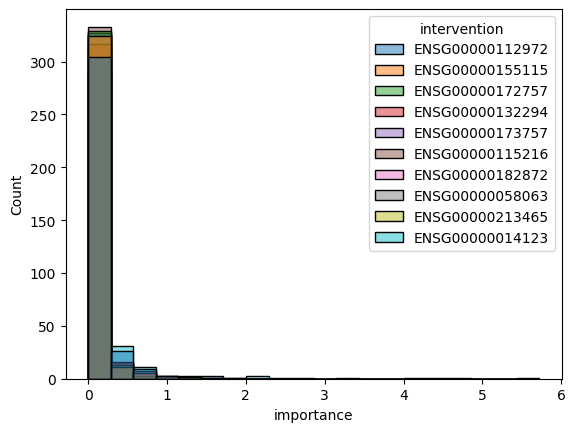

In [10]:
for target in importances_df["target"].unique():
    target_df = importances_df[importances_df["target"] == target]
#     print(target_df.values[:, :-2].mean(axis=0))

    # select a random sample of interventions
    sampled_df = target_df.sample(n=10)
    # plot histogram of importances starting by pivoting all but the last two columns
    melted_target_df = sampled_df.melt(id_vars=["intervention"], value_vars=target_df.columns[:-2], var_name="candidate_gene_name", value_name="importance")
    
    
    sns.histplot(data=melted_target_df, x="importance", hue="intervention", bins=20)
    break

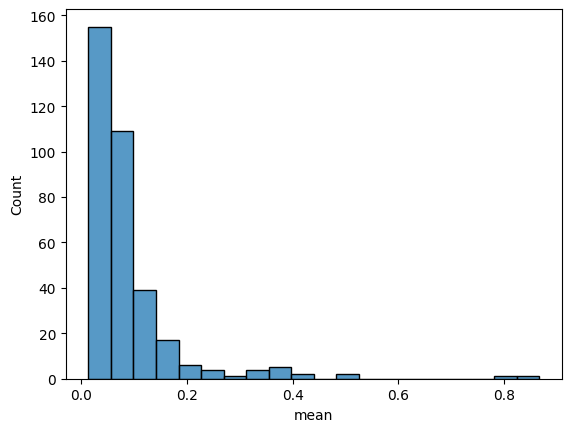

In [11]:
for target in importances_df["target"].unique():
    target_df = importances_df[importances_df["target"] == target]
    mean_df = pd.DataFrame(target_df.values[:, :-2].mean(axis=0).T, columns=["mean"])
    sns.histplot(data=mean_df, x="mean", bins=20)
    break

In [ ]:
min_dfs = []
for target in importances_df["target"].unique():
    target_df = importances_df[importances_df["target"] == target]
    min_df = pd.DataFrame(target_df.values[:, :-2].min(axis=0).T, columns=["min"])
#     sns.histplot(data=min_df, x="min", bins=20)
    min_dfs.append(min_df)
full_min_df = pd.concat(min_dfs, axis=0)
sns.histplot(data=full_min_df, x="min", bins=20)

/home/justinhong/miniconda3/envs/cb/lib/python3.9/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)


In [12]:
# check alignment with GRNboost importances
grn_df = pd.read_csv("../output/betterboost-87.csv", index_col=0, header=0)
grn_df

,TF,target,importance,pvalue,pvalue_rank
40,ENSG00000119777,ENSG00000149357,3.047134e-01,5.382712e-160,0.000002
221,ENSG00000100804,ENSG00000187514,4.097284e-01,3.333881e-103,0.000004
229,ENSG00000119718,ENSG00000133112,3.069098e-01,9.736304e-89,0.000006
221,ENSG00000100804,ENSG00000075624,1.271286e-01,1.433925e-85,0.000007
316,ENSG00000105618,ENSG00000123416,2.277256e-01,1.554359e-84,0.000009
...,...,...,...,...,...
287,ENSG00000187531,ENSG00000152253,4.858030e-08,NaN,0.199772
187,ENSG00000111642,ENSG00000232838,4.632336e-08,NaN,0.199774
304,ENSG00000130165,ENSG00000197780,4.107777e-08,NaN,0.199776
314,ENSG00000105568,ENSG00000185246,2.976632e-09,NaN,0.199778


In [13]:
edge_importance_dfs = []
for target in importances_df["target"].unique():
    target_df = importances_df[importances_df["target"] == target]
    mean_df = pd.DataFrame(np.mean(target_df.values[:, :-2], axis=0).T, columns=["bestboost_importance"])
    mean_df["TF"] = target_df.columns[:-2]
    mean_df["target"] = target
    edge_importance_dfs.append(mean_df)
edge_importance_df = pd.concat(edge_importance_dfs, axis=0)

In [14]:
edge_importance_df


,bestboost_importance,TF,target
0,NaN,ENSG00000242485,ENSG00000242485
1,0.237018,ENSG00000160075,ENSG00000242485
2,0.063641,ENSG00000120948,ENSG00000242485
3,0.043468,ENSG00000116670,ENSG00000242485
4,0.026281,ENSG00000116688,ENSG00000242485
...,...,...,...
342,0.104304,ENSG00000072506,ENSG00000071859
343,0.188207,ENSG00000102144,ENSG00000071859
344,0.084771,ENSG00000101972,ENSG00000071859
345,0.054674,ENSG00000071553,ENSG00000071859


In [15]:
# get intersection of these two dataframes
intersection_df = pd.merge(edge_importance_df, grn_df, how="inner", on=["TF", "target"])
intersection_df

,bestboost_importance,TF,target,importance,pvalue,pvalue_rank
0,0.237018,ENSG00000160075,ENSG00000242485,16.195427,NaN,0.054251
1,0.063641,ENSG00000120948,ENSG00000242485,0.083945,NaN,0.171722
2,0.043468,ENSG00000116670,ENSG00000242485,0.061494,NaN,0.180674
3,0.063724,ENSG00000065526,ENSG00000242485,0.027553,NaN,0.193056
4,0.059628,ENSG00000037637,ENSG00000242485,0.032032,NaN,0.191688
...,...,...,...,...,...,...
84269,0.16035,ENSG00000182220,ENSG00000071859,8.236258,NaN,0.058621
84270,0.09692,ENSG00000124486,ENSG00000071859,5.348781,NaN,0.062772
84271,0.054587,ENSG00000182872,ENSG00000071859,0.257031,0.00003,0.002789
84272,0.104304,ENSG00000072506,ENSG00000071859,2.721673,NaN,0.070878


<Axes: xlabel='importance', ylabel='bestboost_importance'>

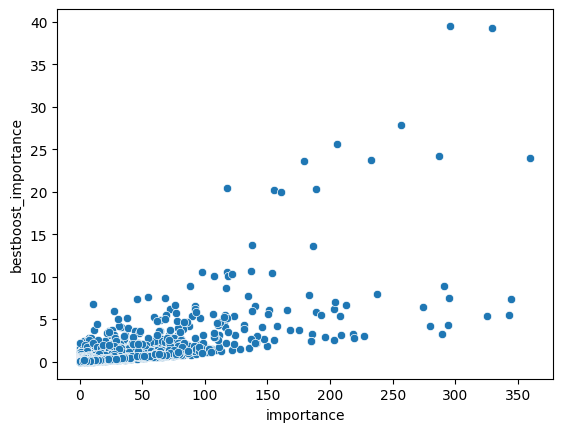

In [16]:
sns.scatterplot(intersection_df, x="importance", y="bestboost_importance")

In [17]:
scipy.stats.pearsonr(x=intersection_df.importance, y=intersection_df.bestboost_importance)

PearsonRResult(statistic=0.6874447158322292, pvalue=0.0)

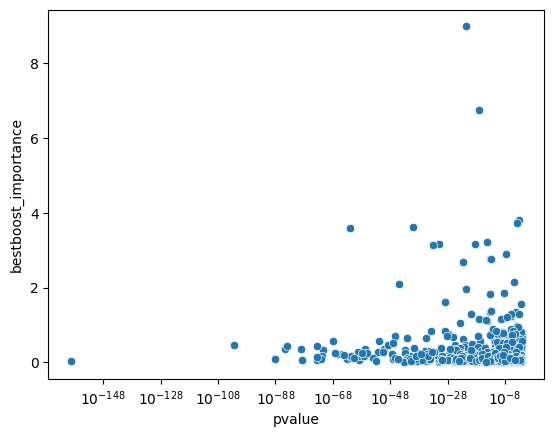

In [18]:
sns.scatterplot(intersection_df, x="pvalue", y="bestboost_importance") 
plt.xscale('log')

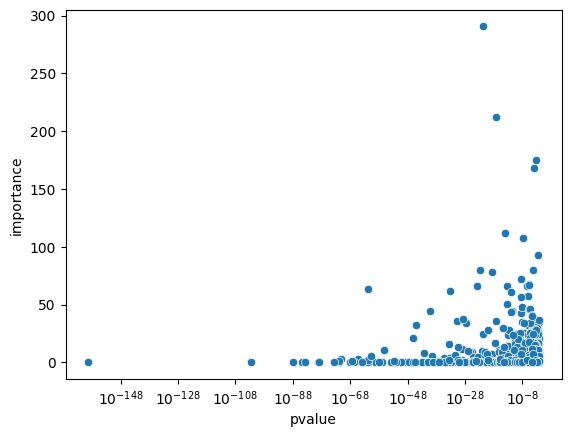

In [19]:
sns.scatterplot(intersection_df, x="pvalue", y="importance") 
plt.xscale('log')